In [38]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import time
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dijkstra's algorithm manual implementation

In [94]:
# Implements Dijkstra's algorithm to find the quickest time taken to go froma  certain starting node to an ending node within the UCLA Campus


import copy
import statistics

def connected_node_times(start, end, num, datas):
  if(start == end):
    return 0
  direct_time = datas[num][start][end]
  between_nodes = []
  length = 0
  for i in range(0, 21):
    vec = [i != start, i != end, math.isinf(datas[num][start][i]) == False, math.isinf(datas[num][i][end]) == False, i != j]
    if all(item == True for item in vec):
      between_nodes.append(i)
      length = length + 1
  indirect_times = [0 for _ in range(length)]
  for i in range(0, length):
    indirect_times[i] = datas[num][start][between_nodes[i]] + datas[num][between_nodes[i]][end]
  if math.isinf(datas[num][start][end]) == True:
    if len(indirect_times) > 0:
      return min(indirect_times)
    else:
      return 9999
  else:
    allthetimes = [0 for _ in range(length + 1)]
    allthetimes[0] = direct_time
    for k in range(0, length):
      allthetimes[k + 1] = indirect_times[k]
    if len(allthetimes) > 0:
      return min(allthetimes)
    else:
      return 9999
def get_Time(start, end, num, datas):
  mat = datas[num]
  counter = 0
  change = True
  if start == 6 and num == 1:
    start, end = (end, start)
  while change:
    change = False
    counter = counter + 1
    for i in range(0, 21):
      for j in range(0, 21):
        if connected_node_times(i, j, num) != 9999 and connected_node_times(i, j, num) < datas[num][i][j]:
          datas[num][i][j] = connected_node_times(i, j, num)
          change = True
  return datas[num][start - 1][end - 1]

def get_mean_commute_time(n):
  sum = []
  for i in range(1, 22):
    for j in range(1, 22):
      if (math.isinf(get_Time(i, j, n)) == False) and (get_Time(i, j, n) != 0):
        sum.append(get_Time(i, j, n))
  return statistics.mean(sum)


# Least Resistance Algorithm

In [ ]:
# Customized Least Resistance Algorithm

def least_resistance(start, end, d = 0):

  # breaks if already at the end
  if start == end:
    return [0, [start]]
  # sets default values, giving all adjoining nodes to start and end
  completed = False
  boo = True
  spaths = []
  if start == 6 and d == 1:
    (start, end) = (end, start)
    boo = False
  for i in range(1,22):
    if data[d][start-1][i-1] != "":
      spaths.append([i])
  epaths = []
  for i in range(1,22):
    if data[d][i-1][end-1] != "":
      epaths.append([i])
  voltage = 0
  route = []
  # main loop, increases voltage and runs a series of checks
  while not completed:
    voltage += 1
    # for each set of paths, calculates residual voltage left over after subtracting resistance of each existing path
    for paths in spaths:
      residual = voltage
      for i in range(len(paths)):
        if i == 0:
          residual -= float(data[d][start-1][paths[0]-1])
        else:
          residual -= float(data[d][paths[i-1]-1][paths[i]-1])
      # checks if the residual is sufficient to complete another path
      for i in range(1, 22):
        if i != start and paths.count(i) == 0:
          if data[d][paths[len(paths)-1]-1][i-1] != "":
            if residual >= float(data[d][paths[len(paths)-1]-1][i-1]):
              # appends the path as long as it isn't a duplicate
              new_path = []
              for element in paths:
                new_path.append(element)
              new_path.append(i)
              duplicate = False
              for expaths in spaths:
                if expaths == new_path:
                  duplicate = True
              if not duplicate:
                spaths.append(new_path)
    # same implementation as above, but for the set of end paths
    for paths in epaths:
      residual = voltage
      for i in range(len(paths)):
        if i == 0:
          residual -= float(data[d][paths[0]-1][end-1])
        else:
          residual -= float(data[d][paths[i]-1][paths[i-1]-1])
      for i in range(1, 22):
        if i != end and paths.count(i) == 0:
          if data[d][i-1][paths[len(paths)-1]-1] != "":
            if residual >= float(data[d][i-1][paths[len(paths)-1]-1]):
              new_path = []
              for element in paths:
                new_path.append(element)
              new_path.append(i)
              duplicate = False
              for expaths in epaths:
                if expaths == new_path:
                  duplicate = True
                  break
              if not duplicate:
                epaths.append(new_path)
    # check condition for start and end paths meeting at a node
    checklist = [False] * 21
    for paths in spaths:
      checklist[paths[len(paths)-1]-1] = True
    for paths in epaths:
      if checklist[paths[len(paths)-1]-1]:
        # makes sure that the completion isn't from the default values with insufficient voltage
        if data[d][start-1][paths[len(paths)-1]-1] != "" and len(paths) == 1:
          if voltage * 2 <= float(data[d][start-1][paths[len(paths)-1]-1]) + float(data[d][paths[len(paths)-1]-1][end-1]):
            continue
        # creates the route by splicing together the start and reversed end path
        route.append(start)
        for paths_s in spaths:
          if paths_s[len(paths_s)-1] == paths[len(paths)-1]:
            for element in paths_s:
              route.append(element)
            break
        for i in range(len(paths)-2, -1, -1):
          route.append(paths[i])
        route.append(end)
        completed = True
        break
    # check condition for start and end paths meeting on a path
    for paths_s in spaths:
      # finds the residual of all possible start and end paths
      if not completed:
        sresidual = voltage
        for i in range(len(paths_s)):
          if i == 0:
            sresidual -= float(data[d][start-1][paths_s[0]-1])
          else:
            sresidual -= float(data[d][paths_s[i-1]-1][paths_s[i]-1])
        for paths_e in epaths:
          eresidual = voltage
          for j in range(len(paths_e)):
            if j == 0:
              eresidual -= float(data[d][paths_e[0]-1][end-1])
            else:
              eresidual -= float(data[d][paths_e[j]-1][paths_e[j-1]-1])
          # checks if the end nodes are adjoining and sum of residuals can span it
          if data[d][paths_s[len(paths_s)-1]-1][paths_e[len(paths_e)-1]-1] != "":
            if sresidual + eresidual > float(data[d][paths_s[len(paths_s)-1]-1][paths_e[len(paths_e)-1]-1]):
              # creates the route by splicing together the start and reversed end path
              route.append(start)
              for element in paths_s:
                route.append(element)
              for k in range(len(paths_e)-1, -1, -1):
                route.append(paths_e[k])
              route.append(end)
              completed = True
              break
  # calculates time using the paths from the route data
  time = 0
  for i in range(1, len(route)):
    time += float(data[d][route[i-1]-1][route[i]-1])
  # if start and end is connected, check this value against time
  if data[d][start-1][end-1] != "":
    if float(data[d][start-1][end-1]) < time:
      time = float(data[d][start-1][end-1])
      route = [start, end]
  if boo == False:
    route = route[::-1]
  return [time, route]


# Data Visualization

205.305
366.87


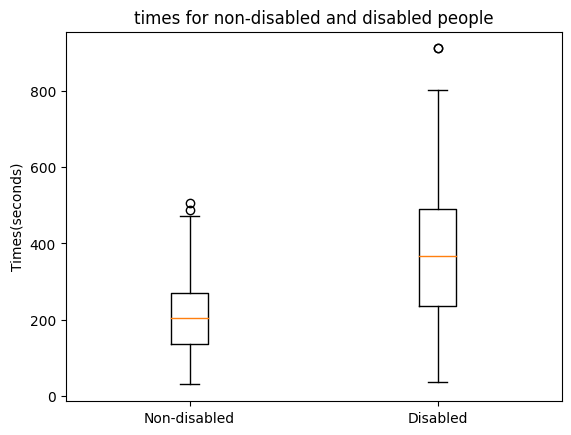

In [98]:
# Data Visualization
able_times = pd.DataFrame(final_mat[0])
disabled_times = pd.DataFrame(final_mat[0])
vec_able = []
vec_disable = []
for i in range(0, 21):
  for j in range(0, 21):
    if i != j:
      vec_able.append(final_mat[0][i][j])
      vec_disable.append(final_mat[1][i][j])
mat = [vec_able, vec_disable]
plt.boxplot(mat)
plt.title("times for non-disabled and disabled people")
plt.xticks([1, 2], ['Non-disabled', 'Disabled'])
plt.ylabel('Times(seconds)')

print(np.median(vec_able))
print(np.median(vec_disable))